# Actividad de evaluación: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    9/03/2022
# Introducción a Machine Learning con Python

In [ ]:
'''
Alejandro Fernández Trigo
29/03/2022 - IE
'''

In [1]:
#Importaciones

#Tratamiento de dataset
import pandas as pd
import numpy as np

#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Métricas de evaluación
from sklearn import metrics

#Time
import time

## Ejercicio 1: Lectura del data set y preprocesamiento

En este ejercicio vamos a realizar la lectura de un dataset de valoraciones de películas. El dataset contiene valoraciones para 100 películas diferentes, y 17 atributos de distintos tipos. 


### 1.1 Lectura del dataset
Realizar la lectura del dataset e imprimir la información de sus columnas.<br>
Mostrar por pantalla el contenido de las 5 primeras filas. <br>
Mostrar una descripción de los estadísticos principales de la columnas

In [39]:
# Lee los datos del .csv
DATOS = pd.read_csv('datos/valoraciones.csv')

In [4]:
# Muestra los 5 primeros datos
DATOS[:5]

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,género_principal,género_secundario,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor,clasificación
0,30000000,151101803,8.2,14000,19000.0,Comedy,Drama,128,9.0,8.7,8.4,8.2,7.9,7.8,7.6,7.5,PG-13
1,150000000,341268248,8.1,2800,28000.0,Animation,Adventure,108,8.3,8.7,8.1,8.4,7.8,8.1,7.8,8.1,PG
2,12000000,51738905,8.1,33000,96000.0,Biography,Drama,118,8.2,8.7,8.0,8.4,7.9,8.2,7.9,8.4,PG-13
3,47000000,100546139,8.0,35000,5300.0,Drama,Mystery,116,8.6,8.4,8.2,8.1,7.8,7.8,7.6,7.7,PG-13
4,9000000,47695371,7.9,518,71000.0,Drama,NaN,137,8.5,8.1,8.1,7.8,7.7,7.7,7.6,7.6,R


In [5]:
DATOS.describe()

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor
count,1.000000e+02,1.000000e+02,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7.838400e+07,1.468679e+08,7.883000,13407.270000,7377.303030,126.420000,8.174000,8.215000,8.005000,7.982000,7.723000,7.780000,7.624000,7.770000
std,7.445295e+07,1.454004e+08,0.247433,10649.037862,13471.568216,19.050799,0.358059,0.381484,0.281904,0.321417,0.260479,0.282128,0.213258,0.301344
min,3.000000e+06,2.238380e+05,7.500000,39.000000,12.000000,91.000000,7.400000,7.200000,7.600000,7.300000,7.200000,7.200000,7.100000,7.000000
25%,1.575000e+07,4.199752e+07,7.700000,1000.000000,580.000000,114.750000,7.900000,7.975000,7.800000,7.700000,7.500000,7.600000,7.475000,7.500000
50%,4.225000e+07,1.070266e+08,7.800000,13000.000000,1000.000000,124.000000,8.150000,8.300000,8.000000,8.000000,7.700000,7.800000,7.600000,7.800000
75%,1.500000e+08,2.107548e+08,8.100000,20000.000000,11000.000000,136.250000,8.400000,8.500000,8.100000,8.200000,7.900000,8.000000,7.800000,7.925000
max,2.600000e+08,9.366622e+08,8.800000,35000.000000,96000.000000,180.000000,9.100000,9.000000,9.000000,8.800000,8.700000,8.500000,8.100000,8.500000


### 1.2 Tratamiento de valores ausentes
Comprobar si existen valores ausentes en el dataset, y, en su caso, tratarlos de la forma que se considere más adecuada

In [40]:
# Comprueba si hay valores ausente; los muestra:
DATOS.isnull()

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,género_principal,género_secundario,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor,clasificación
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
# Eliminar filas vacías, obteniendo un conjunto PELICULAS ya filtrado:
PELICULAS = DATOS.dropna()

In [8]:
# Lo compruebo:
PELICULAS.isnull()

# Se puede observar que se han eliminado varias filas:

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,género_principal,género_secundario,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor,clasificación
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
PELICULAS.head()

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,género_principal,género_secundario,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor,clasificación
0,30000000,151101803,8.2,14000,19000.0,Comedy,Drama,128,9.0,8.7,8.4,8.2,7.9,7.8,7.6,7.5,PG-13
1,150000000,341268248,8.1,2800,28000.0,Animation,Adventure,108,8.3,8.7,8.1,8.4,7.8,8.1,7.8,8.1,PG
2,12000000,51738905,8.1,33000,96000.0,Biography,Drama,118,8.2,8.7,8.0,8.4,7.9,8.2,7.9,8.4,PG-13
3,47000000,100546139,8.0,35000,5300.0,Drama,Mystery,116,8.6,8.4,8.2,8.1,7.8,7.8,7.6,7.7,PG-13
5,12000000,27007844,7.7,19000,12000.0,Crime,Drama,102,8.1,7.7,7.8,7.4,7.6,7.4,7.6,7.7,R


## Ejercicio 2. Visualización
### 2.1 Visualización de atributos independientes
Mostrar un diagrama de tartas con la frecuencia de aparición de los géneros principales<br>
Mostrar un diagrama de barras (o un histograma) con la frecuencia de aparición de las distintas clasificaciones de las películas, según la recomendación establecida: <br>
- G: General Audiences
- PG: Parental Guidance Suggested
- PG-13: Parents Strongly Cautioned (>13)
- R: Restricted (>17) <br>

Mostrar un diagrama con histograma y estimación KDE de la distribución de probabilidad del atributo valoración (realizar un ajuste del parámetro bins para una mejor visualización)

<AxesSubplot:ylabel='género_principal'>

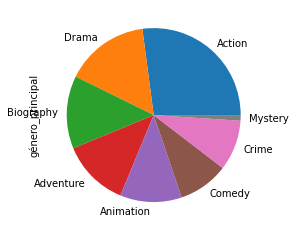

In [10]:
# Diagrama de tarta con los generos principales:
PELICULAS['género_principal'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='clasificación', ylabel='count'>

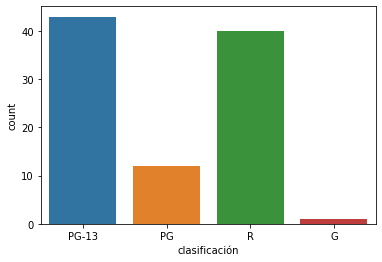

In [11]:
# Diagrama de barras con frecuencia aparación según la recomendación: 
sns.countplot(data=PELICULAS, x='clasificación')

<AxesSubplot:>

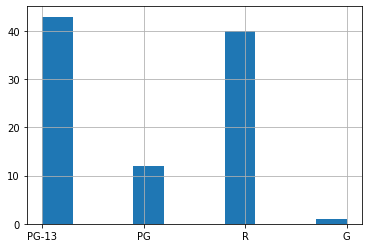

In [12]:
# Los mismo pero con un histograma:
PELICULAS['clasificación'].hist()

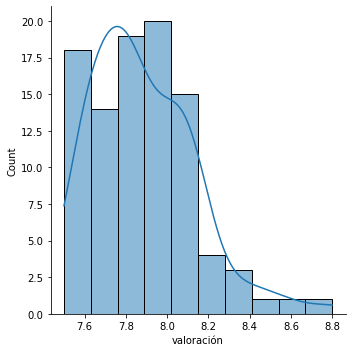

In [13]:
# Histograma y estimación KDE de la distribución de probabilidad del atributo valoración:
sns.displot(data=PELICULAS, x='valoración', kde=True, bins = 10)

### 2.2 Visualización combinada de atributos
Mostrar las distribuciones de probabilidad para el atributo duración según las distintas clasificaciones<br>
Crear un mapa de calor con la frecuencia de cada posible pareja de valores de atributos clasificación y género_principal<br>
Mostrar un diagrama de cajas para el atributo presupuesto, detallado según el atributo género_principal

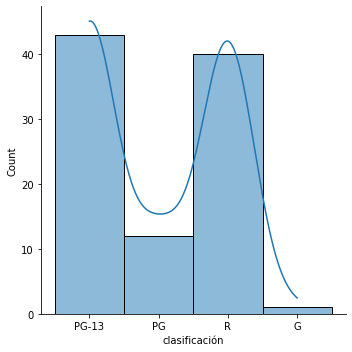

In [53]:
# Distribución probabilidad atributo duración:
sns.displot(data=PELICULAS, x='clasificación', kde=True)

In [42]:
# Mapa de calor para cada pareja posible de valores (clasificación, género_principal):
tabla_auxiliar = pd.crosstab(index=PELICULAS['clasificación'], columns=PELICULAS['género_principal'])
print(tabla_auxiliar)

género_principal  Action  Adventure  Animation  Biography  Comedy  Crime  \
clasificación                                                              
G                      0          0          1          0       0      0   
PG                     0          1         10          0       1      0   
PG-13                 17          7          0          7       3      0   
R                      9          4          0          6       5      9   

género_principal  Drama  Mystery  
clasificación                     
G                     0        0  
PG                    0        0  
PG-13                 9        0  
R                     6        1  


<AxesSubplot:xlabel='género_principal', ylabel='clasificación'>

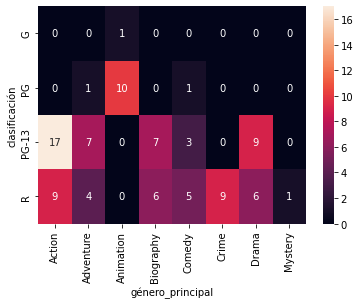

In [43]:
# Ahora muestro el mapa de calor asociado:
sns.heatmap(tabla_auxiliar, annot=True, fmt='d')

<AxesSubplot:xlabel='presupuesto', ylabel='género_principal'>

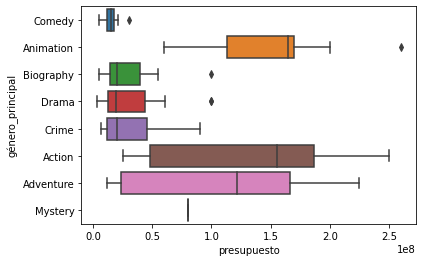

In [16]:
# Diagrama de cajas para el atributo presupuesto según género_principal:
sns.boxplot(x = PELICULAS['presupuesto'], y = PELICULAS['género_principal'])

## Ejercicio 3. Codificación de atributos
### 3.1. Tipos de atributos

Imprimir los posibles valores de los atributos categóricos


In [30]:
'''
Las variables categóricas toman valores fijos; son: género_principal, género_secundario y clasificación.
'''
PELICULAS.head()

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,género_principal,género_secundario,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor,clasificación
0,30000000,151101803,8.2,14000,19000.0,Comedy,Drama,128,9.0,8.7,8.4,8.2,7.9,7.8,7.6,7.5,PG-13
1,150000000,341268248,8.1,2800,28000.0,Animation,Adventure,108,8.3,8.7,8.1,8.4,7.8,8.1,7.8,8.1,PG
2,12000000,51738905,8.1,33000,96000.0,Biography,Drama,118,8.2,8.7,8.0,8.4,7.9,8.2,7.9,8.4,PG-13
3,47000000,100546139,8.0,35000,5300.0,Drama,Mystery,116,8.6,8.4,8.2,8.1,7.8,7.8,7.6,7.7,PG-13
5,12000000,27007844,7.7,19000,12000.0,Crime,Drama,102,8.1,7.7,7.8,7.4,7.6,7.4,7.6,7.7,R


In [31]:
DATOS_CATEGORICOS = PELICULAS[['género_principal', 'género_secundario', 'clasificación']]
DATOS_CATEGORICOS.head()

,género_principal,género_secundario,clasificación
0,Comedy,Drama,PG-13
1,Animation,Adventure,PG
2,Biography,Drama,PG-13
3,Drama,Mystery,PG-13
5,Crime,Drama,R


In [44]:
'''
Este bucle imprime un DataFrame que muestra los tres datos categóricos, junto al nº de posibles valores que toman y una lista
de esos posibles x valores (llamados niveles).
'''
niveles = pd.DataFrame(columns = ['Números', 'Niveles'])

for atributo in DATOS_CATEGORICOS.columns.values:
    valores = list(DATOS_CATEGORICOS[atributo].value_counts().keys())
    niveles.loc[atributo] = (len(valores), valores)
    
niveles

,Números,Niveles
género_principal,8,"[Action, Drama, Biography, Adventure, Animatio..."
género_secundario,19,"[Drama, Adventure, Comedy, Romance, Biography,..."
clasificación,4,"[PG-13, R, PG, G]"


### 3.2. Codificación de los atributos categóricos
Realizar el tipo de codificación más apropiada para cada uno de los atributos anteriores

In [78]:
# Codificación label encoding para el atributo clasificación:
# Comentado porque me da problemas al ejecutarlo:

'''
PELICULAS['clasificación-label'] = PELICULAS['clasificación'].map({'PG-13' : 'Parents Strongly Cautioned', 'G' : 'General audiences', 'R' : 'Restricted', 'PG' : 'Parental Guidande Suggested'})
DATOS.head()
'''

"\nPELICULAS['clasificación-label'] = PELICULAS['clasificación'].map({'PG-13' : 'Parents Strongly Cautioned', 'G' : 'General audiences', 'R' : 'Restricted', 'PG' : 'Parental Guidande Suggested'})\nDATOS.head()\n"

In [35]:
# Codificación one hot encoding para los atributos género_principal y género_secundario:
PELICULAS = pd.get_dummies(PELICULAS, columns = ['género_principal'])
PELICULAS = pd.get_dummies(PELICULAS, columns = ['género_secundario'])
PELICULAS.head()

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,...,género_secundario_Horror,género_secundario_Music,género_secundario_Musical,género_secundario_Mystery,género_secundario_Romance,género_secundario_Sci-Fi,género_secundario_Sport,género_secundario_Thriller,género_secundario_War,género_secundario_Western
0,30000000,151101803,8.2,14000,19000.0,128,9.0,8.7,8.4,8.2,...,0,0,0,0,0,0,0,0,0,0
1,150000000,341268248,8.1,2800,28000.0,108,8.3,8.7,8.1,8.4,...,0,0,0,0,0,0,0,0,0,0
2,12000000,51738905,8.1,33000,96000.0,118,8.2,8.7,8.0,8.4,...,0,0,0,0,0,0,0,0,0,0
3,47000000,100546139,8.0,35000,5300.0,116,8.6,8.4,8.2,8.1,...,0,0,0,1,0,0,0,0,0,0
5,12000000,27007844,7.7,19000,12000.0,102,8.1,7.7,7.8,7.4,...,0,0,0,0,0,0,0,0,0,0


## Ejercicio 4. Predicción

Queremos construir un modelo de predicción para el atributo valoración. <br>
Para ello, seguiremos los siguientes pasos:

- Determinar el tipo de predicción más adecuada, clasificación o regresión
- Preparar el conjunto de datos para llevar acabo el entrenamiento del modelo:
    - Eliminar atributos no deseados
    - Realizar la división en X e y del dataset.
- Crear un DataFrame para almacenar los resultados que tenga dos columnas: evaluación, tiempo
- Definir una función que realice un experimento, a partir de un estimador concreto. La función devolverá el valor de la medida de evaluación elegida y el tiempo empleado, con una validación cruzada de 10 particiones.
- Añadir a la tabla de resultados al menos 5 líneas en las que se prueben 5 estimadores diferentes (o algunos iguales con distinta parametrización)                                                         


In [46]:
'''
Un clasificador nos responde a una pregunta de SI/NO (por ejemplo), por ejemplo, para el ejemplo visto de tratamiento de 
cáncer, tiene sentido usar clasificación ante una pregunta del tipo "¿Este cáncer es benigno o no?". Pero en el caso de 
películas, tiene más sentido una regresión ya que su salida será un número; nos permite preguntar: "¿Cuanto recaudará en
taquilla?" (por ejemplo).
'''
PELICULAS.head()

,presupuesto,recaudación,valoración,popularidad_actor_1,popularidad_actor_2,género_principal,género_secundario,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor,clasificación
0,30000000,151101803,8.2,14000,19000.0,Comedy,Drama,128,9.0,8.7,8.4,8.2,7.9,7.8,7.6,7.5,PG-13
1,150000000,341268248,8.1,2800,28000.0,Animation,Adventure,108,8.3,8.7,8.1,8.4,7.8,8.1,7.8,8.1,PG
2,12000000,51738905,8.1,33000,96000.0,Biography,Drama,118,8.2,8.7,8.0,8.4,7.9,8.2,7.9,8.4,PG-13
3,47000000,100546139,8.0,35000,5300.0,Drama,Mystery,116,8.6,8.4,8.2,8.1,7.8,7.8,7.6,7.7,PG-13
5,12000000,27007844,7.7,19000,12000.0,Crime,Drama,102,8.1,7.7,7.8,7.4,7.6,7.4,7.6,7.7,R


In [62]:
# Preparar el conjunto; usamos el atributo valoración:
'''
X es el conjunto, y la serie de valoraciones.
Elimino todos los valores que no sean numéricos; además del atributo valoración.
'''
X_1 = PELICULAS.drop(['valoración'], axis = 1)
X_2 = X_1.drop(['género_principal'], axis = 1)
X_3 = X_2.drop(['género_secundario'], axis = 1)
X = X_3.drop(['clasificación'], axis = 1)

y = PELICULAS['valoración']

In [63]:
X.head()

,presupuesto,recaudación,popularidad_actor_1,popularidad_actor_2,duración,voto_masculino_adolescente,voto_femenino_adolescente,voto_masculino_joven,voto_femenino_joven,voto_masculino_adulto,voto_femenino_adulto,voto_masculino_mayor,voto_femenino_mayor
0,30000000,151101803,14000,19000.0,128,9.0,8.7,8.4,8.2,7.9,7.8,7.6,7.5
1,150000000,341268248,2800,28000.0,108,8.3,8.7,8.1,8.4,7.8,8.1,7.8,8.1
2,12000000,51738905,33000,96000.0,118,8.2,8.7,8.0,8.4,7.9,8.2,7.9,8.4
3,47000000,100546139,35000,5300.0,116,8.6,8.4,8.2,8.1,7.8,7.8,7.6,7.7
5,12000000,27007844,19000,12000.0,102,8.1,7.7,7.8,7.4,7.6,7.4,7.6,7.7


In [64]:
# Crear un DataFrame para almacenar los resultados que tenga dos columnas: evaluación, tiempo:
RESULTADOS = pd.DataFrame(columns=['EVALUACIÓN', 'TIEMPO'])
RESULTADOS

,EVALUACIÓN,TIEMPO


In [83]:
'''
Definir una función que realice un experimento, a partir de un estimador concreto. La función devolverá el valor de la 
medida de evaluación elegida y el tiempo empleado, con una validación cruzada de 10 particiones.
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, learning_curve

# Definición del clasificador 
clasificador = LinearRegression()
clasificador.fit(X,y)

# Con el clasificador creado, hacer validación cruzada de 10 participantes:
y_pred_cross = cross_val_predict(clasificador, X, y, cv = 10)

# Definicion de la función, recibe el clasificador, X y recibirá y_pred_cross:
def experimento(clasificador, X, y):
    
    # Tiempo inicio:
    tini = time.time()
    
    y_pred = cross_val_predict(clasificador, X, y)
    f1 = f1_score(y, y_pred)
    
    # Tiempo fin:
    tfin = time.time()
    
    return (f1, tfin - tini)

In [89]:
'''
Añadir a la tabla de resultados al menos 5 líneas en las que se prueben 5 estimadores diferentes 
(o algunos iguales con distinta parametrización)
'''

# Estimadores:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Añadir a la tabla creada previamente los resultados de aplicar la función antes definida con dichos estimadores:
# Algo aquí se está usando mal y da errores.
RESULTADOS.loc['LogRegr'] = experimento(LinearRegression(), X, y)
RESULTADOS.loc['Kneigh-3'] = experimento(KNeighborsRegressor(3), X, y)
RESULTADOS.loc['Kneigh-5'] = experimento(KNeighborsRegressor(5), X, y)
RESULTADOS.loc['DTree'] = experimento(DecisionTreeRegressor(), X, y)
RESULTADOS.loc['GBoost'] = experimento(GradientBoostingRegressor(), X, y)

ValueError: continuous is not supported

In [88]:
RESULTADOS

,EVALUACIÓN,TIEMPO
LogRegr,"[0.941572191036284, 0.9773653316089441, 0.9463...",0.039970
Kneigh-3,"[nan, nan, nan, nan, nan]",0.020993
Kneigh-5,"[nan, nan, nan, nan, nan]",0.019002
DTree,"[nan, nan, nan, nan, nan]",0.031002
GBoost,"[nan, nan, nan, nan, nan]",0.023995


## Ejercicio de ampliación
## Ejercicio 5. Predicción - Clasificación basada en un atributo continuo

Queremos construir un modelo de clasificación para un atributo continuo.
Para ello, seguiremos los siguientes pasos:

- Elegir un atributo de tipo numérico y estudiar su distribución
- Elegir un valor de corte adecuado y crear un nuevo atributo mediante una codificación binaria
   - El valor de corte debe proporionar un balanceo adecuado entre las clases
- Preparar el conjunto de datos para llevar acabo el entrenamiento del modelo:
    - Eliminar atributos no deseados
    - Realizar la división en X e y del dataset.
- Crear un DataFrame para almacenar los resultados que tenga dos columnas: evaluación, tiempo
- Definir una función que realice un experimento de clasificación, a partir de un estimador concreto. La función devolverá el valor de la medida de evaluación elegida y el tiempo empleado, con una validación cruzada de 10 particiones.
- Añadir a la tabla de resultados al menos 5 líneas en las que se prueben 5 clasificadores diferentes (o algunos iguales con distinta parametrización)

In [ ]:
'''
Alejandro Fernández Trigo
29/03/2022 - IE
'''